# Starting density controls final area of activation

### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.integrate as sint
from scipy.spatial import Voronoi

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
%load_ext blackcellmagic

<hr>

## Growth processes and bi-phasic induction

We observe that, in some long time-courses, as cell density increases due to cell division, the propagation of fluorescence from a sender cell slows down and can eventually extinguish entirely, resulting in a bi-phasic induction behavior. 

To understand this in the context of our theoretical model, we consider cells arranged in a regular hexagonal pattern. We represent the average cell-cell distance and cell density of a rectangular lattice with variables $r$ and $\rho$ such that $r=\frac{1}{\sqrt{\rho}}$. 

Using the regularity assumption, we can capture changes in density using `Model 2a`,

\begin{align}
\frac{\mathrm{d}\, \vec{s}}{\mathrm{d} t} &= \lambda + \alpha \frac{\left(\vec{\overline{s}}_{(t-\tau)}\right)^p}{k^p + \left(\delta \vec{s}_{(t-\tau)}\right)^p + \left(\vec{\overline{s}}_{(t-\tau)}\right)^p} - \vec{s} \\[1em]
\vec{\overline{s}} &= \frac{\ell A \vec{s}}{P_0},
\end{align}

where $\ell=\frac{r}{\sqrt{3}}$ is the shared contact between any two adjacent cells (edge length of the hexagon).

We represent density with the variable $\rho$ and model changes in density by assuming that cell growth follow the logistic growth equation

\begin{align}
\frac{\mathrm{d} \rho}{\mathrm{d} t} &= \xi\,\rho\, \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).
\end{align}

where $\rho_\text{max}$ is the maximum density at saturation and $\xi$ is the growth rate of the cell line. We previously non-dimensionalized chemical reaction rates to the signal decay rate [ref]. If we assume that the signal decay rate is equal to the growth rate (i.e. protein degradation contributes negligibly to decay), we can set $\xi=1$. By direct integration,

\begin{align}
\rho(t) &= \frac{\rho_\text{max} \rho_0\, e^t}{\rho_\text{max} + \rho_0\,(e^t-1)}.
\end{align}



In [3]:
@numba.njit
def rho_t(t, rho_0, rho_max):
    """Returns density at time(s) `t` under logistic assumption."""
    return rho_max * rho_0 * np.exp(t) / (rho_max + rho_0 * (np.exp(t) - 1))

#### Estimating density parameters

We define the density $\rho=1$ to be the density at which cells fill the surface area of the culture well with few to no gaps and the culture is ~100% confluent. We had previously estimated this to correspond to a density of ~$1250\; \text{mm}^{-2}$ [ref]. In another growth experiment [ref], we estimated the cell density at saturation to be ~$5000\; \text{mm}^{-2}$, or $\rho_\text{max}\approx4$.

### Comparing maximal area of activation

To understand how the starting density is related to the maximum area at activation, we sample values of $\rho_0$ regularly on the interval $\rho_0 \in [1,\rho_\text{max}]$ and calculate the maximum area of activated cells.

#### Define function(s) for DDE integration

In [4]:
def tc_rhs_2a(S, S_delay, Adj, sender_idx, alpha, k, p, delta, lambda_, ell):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Set perimeter at density = 1
    P0 = 6 / np.sqrt(3)

    # Get input signal across each interface
    S_bar = ell * Adj @ S_delay / P0

    # Calculate dE/dt
    dS_dt = (
        alpha
        * (S_bar ** p)
        / (k ** p + (delta * S_delay) ** p + S_bar ** p)
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt


def get_rhs(Adj, sender_idx, func):
    """Given the indices of sender cells, returns a 
    function `rhs` with call signature 
    rhs(S, S_delay, *args) that can be passed to 
    `lsig.integrate_DDE` and `lsig.integrate_DDE_varargs`.
    """

    def rhs(S, S_delay, *args):
        return func(S, S_delay, Adj, sender_idx, *args)

    return rhs

In [5]:
# Make square lattice
rows = cols = 44
r = 1.   # cell-cell distance
X, Adj = lsig.hex_Adj(rows, cols, r=r, sparse=True)

# Get # cells
n = X.shape[0]

In [6]:
# Set sender cell
sender_idx = lsig.get_center_cells(X)

# Get RHS
rhs = get_rhs(Adj, sender_idx, tc_rhs_2a)

We set the time-window long enough to reach stationarity.

In [7]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

In [8]:
# Set options for rho sampling
rho_min, rho_max = 1, 4
n_rho = 13

# Sample rho 
rho_0_space = np.linspace(rho_min, rho_max, n_rho)

For the remaining parameters, we use our example parameter set

In [9]:
# Set signaling parameters
alpha = 3
k = 0.12
p = 2
delta = 3
lambda_ = 1e-6

# Set delay
delay = 0.4

In [10]:
# Set max density
rho_max = 4

# Step function
# ell_t = np.array([1 / np.sqrt(3 * (rho_0 + (rho_max-rho_0)*(t_>2))) for t_ in t])

In [11]:
def A_cells_um(nc, rho, A_c_rho1=800):
    """
    Returns the area of `nc` cells at density `rho` in 
    micrometers^2.
    `A_c_rho1` is the area of each cell at a density of 1 in
    micrometers^2.
    """
    return nc * A_c_rho1 / rho

In [12]:
# Set initial fluorescence
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

# Initialize results vector
S_rho0_t = np.empty((n_rho, nt, n), dtype=np.float32)
A_rho0_t = np.empty((n_rho, nt), dtype=np.float32)

iterator = range(n_rho)
iterator = tqdm(iterator)
for i in iterator:

    # Calculate logistic growth
    rho_0 = rho_0_space[i]
    rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
    r_t = 1/np.sqrt(rho_t_)
    ell_t = r_t / np.sqrt(3)

    # Package parameters
    args = (alpha, k, p, delta, lambda_, ell_t[0])

    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs,
        var_vals=ell_t,
        dde_args=args,
        E0=S0,
        delay=delay,
        where_vars=5,
        min_delay=5,
        progress_bar=False,
    )
    
    S_rho0_t[i] = S_t
    n_act = (S_t > k).sum(axis=1)
    A_rho0_t[i] = A_cells_um(n_act, rho_t_)

100%|██████████| 13/13 [00:01<00:00,  7.19it/s]


In [13]:
# Select run to animate
run = 0

# Calculate logistic growth
rho_0 = rho_0_space[run]
rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
r_t = 1/np.sqrt(rho_t_)

# Set window to fixed size
X_t = (np.array([X] * nt) * r_t[:, np.newaxis, np.newaxis])
X_fin = X_t[-1]
xlim = X_fin[:, 0].min(), X_fin[:, 0].max()
ylim = X_fin[:, 1].min(), X_fin[:, 1].max()

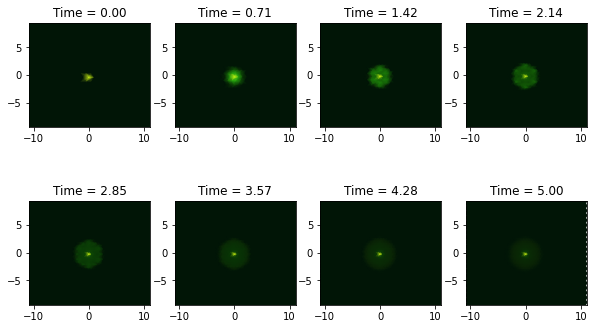

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_t[i],
        rows=rows,
        cols=cols,
        var=S_rho0_t[run], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
    )

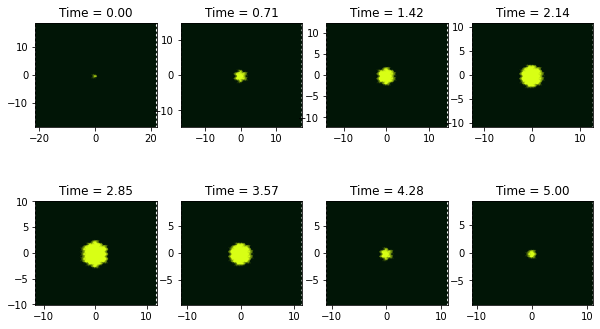

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_t[i],
        rows=rows,
        cols=cols,
        var=S_rho0_t[run] > k, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
#         xlim=xlim,
#         ylim=ylim,
        title=title,
    )

In [16]:
# Get max activated area for each condition
S_max_area = A_rho0_t.max(axis=1)

:Scatter   [rho_0]   (max_area)
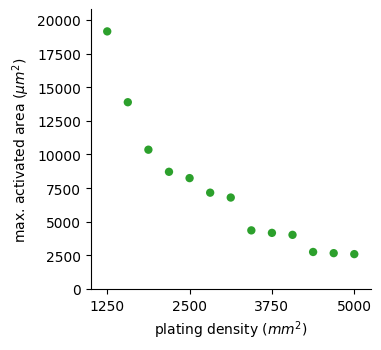

In [17]:
%%capture --no-display

data = {
    "max_area": S_max_area,
    "rho_0": rho_0_space * 1250,
}

p1 = hv.Scatter(
    data=data,
    kdims=["rho_0"], 
    vdims=["max_area"],
).opts(
    color=cc.glasbey_category10[2],
    xlabel=r"plating density ($mm^2$)",
    xlim=(1000, 5250),
    xticks=[1250, 2500, 3750, 5000],
    ylabel=r"max. activated area ($\mu m^2$)",
    ylim=(0, None),
)

hv.output(p1, dpi=100)

<hr>

In [18]:
import os

## Save plots

In [19]:
# Set filepath and format
fmt = "png"
dirname = "plots"
fname = f"active_area_plot_rhomax_{rho_max:.2f}_rho0_{rho_min:.2f}-{rho_max:.2f}" + "." + fmt

fpath = os.path.join(dirname, fname)

In [20]:
%%capture --no-display

hv.save(p1, fpath, fmt=fmt, dpi=150)

<hr>

In [21]:
%load_ext watermark

In [22]:
%watermark -v -p numpy,scipy,numba,holoviews,jupyterlab

CPython 3.7.7
IPython 7.18.1

numpy 1.18.1
scipy 1.4.1
numba 0.51.2
holoviews 1.13.2
jupyterlab 1.2.6


<hr>

Let's compare this to data quantitatively. At a plating density of $\rho=1$, we see a maximal area of $1\text{e-}5$ to $2\text{e-}5\text{ $\mu$m}^2$ per propagation spot. The simulated maximum area at this density is ~`20000 um^2`, so the prediction is off by about an order of magnitude.

To address this, first I'll see if this is possible by modifying the core rate parameters. To do this, I will set `alpha` very large and the delay very short.

In [19]:
# Try new rate parameters
alpha = 10
k = 0.16
p = 2
delta = 3
lambda_ = 1e-6

# Set delay
delay = 0.1

In [20]:
# Set initial fluorescence
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

# Initialize results vector
S_rho0_t = np.empty((n_rho, nt, n), dtype=np.float32)
A_rho0_t = np.empty((n_rho, nt), dtype=np.float32)

iterator = range(n_rho)
iterator = tqdm(iterator)
for i in iterator:

    # Get parameters
    rho_0 = rho_0_space[i]
    rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
    r_t = 1/np.sqrt(rho_t_)
    ell_t = r_t / np.sqrt(3)

    # Package parameters
    args = (alpha, k, p, delta, lambda_, ell_t[0])

    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs,
        var_vals=ell_t,
        dde_args=args,
        E0=S0,
        delay=delay,
        where_vars=5,
        min_delay=5,
        progress_bar=False,
    )
    
    S_rho0_t[i] = S_t
    n_act = (S_t > k).sum(axis=1)
    A_rho0_t[i] = A_cells_um(n_act, rho_t_)

100%|██████████| 13/13 [00:01<00:00,  9.87it/s]


In [21]:
# Select run to animate
run = 0

# Calculate logistic growth
rho_0 = rho_0_space[run]
rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
r_t = 1/np.sqrt(rho_t_)

# Set window to fixed size
X_t = (np.array([X] * nt) * r_t[:, np.newaxis, np.newaxis])
X_fin = X_t[-1]
xlim = X_fin[:, 0].min() * 0.95, X_fin[:, 0].max() * 0.95
ylim = X_fin[:, 1].min() * 0.95, X_fin[:, 1].max() * 0.95

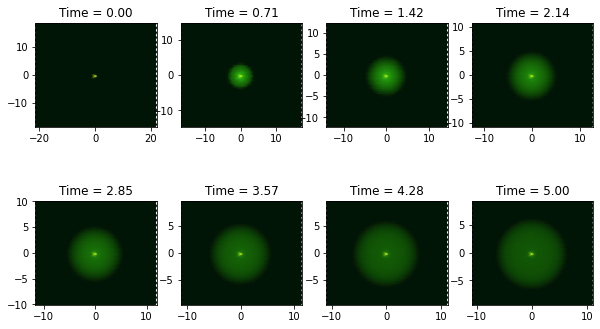

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_t[i],
        rows=rows,
        cols=cols,
        var=S_rho0_t[run], 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
#         xlim=xlim,
#         ylim=ylim,
        title=title,
    )

In [23]:
# Get max activated area for each condition
S_max_area = A_rho0_t.max(axis=1)

:Scatter   [rho_0]   (max_area)
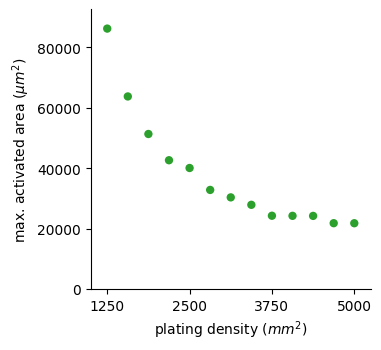

In [24]:
%%capture --no-display

data = {
    "max_area": S_max_area,
    "rho_0": rho_0_space * 1250,
}

p2 = hv.Scatter(
    data=data,
    kdims=["rho_0"], 
    vdims=["max_area"],
).opts(
    color=cc.glasbey_category10[2],
    xlabel=r"plating density ($mm^2$)",
    xlim=(1000, 5250),
    xticks=[1250, 2500, 3750, 5000],
    ylabel=r"max. activated area ($\mu m^2$)",
    ylim=(0, None),
)

hv.output(p2, dpi=100)

This increases the maximum area to above `1e5`, but the area-density relationship changes dramatically, becoming almost linear. 

Another way the propagation area could increase is if cells are interacting with more than their nearest neighbors. We could create a new adjacency matrix that either uses a distance cutoff `irad` (interaction radius) or the maximum graph path-length `kn` between neighbors. We'll revert to the old parameter set.

In [25]:
from scipy.spatial.distance import pdist, squareform


def irad_Adj(X, irad, dtype=np.float32, sparse=False, **kwargs):
    """
    Construct adjacency matrix for a non-periodic array of 
    nodes (cells). Adjacency is determined by calculating pairwise 
    distance and applying a threshold `irad` (interaction radius)
    """
    
    n = X.shape[0]
    A = squareform(pdist(X)) <= irad
    
    if sparse:
        A = csr_matrix(A)
        eye = csr_matrix((np.ones(n, dtype=dtype), (np.arange(n), np.arange(n))))
    else:
        eye = np.eye(n)
        
    return A - eye

In [26]:
from scipy.sparse import csr_matrix


def kn_Adj(kn, rows, cols=0, dtype=np.float32, sparse=False, **kwargs):
    """
    Construct adjacency matrix for a periodic array of 
    nodes (cells). Adjacency is determined by calculating pairwise 
    distance and applying a threshold `irad` (interaction radius)
    """
    
    if not cols:
        cols = rows
    
    n = rows * cols
    
    # Construct adjacency matrix
    if sparse:
        A = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
        eye = csr_matrix((np.ones(n, dtype=dtype), (np.arange(n), np.arange(n))))
        A = (A + eye) ** kn > 0
        
    else:
        A = lsig.make_Adj(rows, cols, dtype=dtype, **kwargs)
        eye = np.eye(n)
        A = numpy.linalg.matrix_power(A + eye, kn) > 0
    
    return A - eye

Now I need to modify the RHS function to accomodate many neighbors

I'm using a modified version of Sprinzak's filopodia model in "Modeling the Notch response" - here I consider filopodia and body contacts as equal contributors to signaling.

In [27]:
def tc_rhs_2a_kn(S, S_delay, Adj, sender_idx, alpha, k, p, delta, lambda_, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = 1 / np.sqrt(rho)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay) / (Adj @ np.ones(S.shape[0]))

    # Calculate dE/dt
    dS_dt = (
        alpha
        * (S_bar ** p)
        / (k ** p + (delta * S_delay) ** p + S_bar ** p)
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt


def get_rhs(Adj, sender_idx, func):
    """Given the indices of sender cells, returns a 
    function `rhs` with call signature 
    rhs(S, S_delay, *args) that can be passed to 
    `lsig.integrate_DDE` and `lsig.integrate_DDE_varargs`.
    """

    def rhs(S, S_delay, *args):
        return func(S, S_delay, Adj, sender_idx, *args)

    return rhs

In [28]:
# Make square lattice
X = lsig.hex_grid(rows, cols, r=r, sparse=True)
coeff = 3
iAdj = irad_Adj(X, coeff * r + 0.05)
kAdj = kn_Adj(coeff, rows, cols, sparse=True)

:Layout
   .Overlay.I  :Overlay
      .Points.I  :Points   [x,y]
      .Points.II :Points   [x,y]
   .Overlay.II :Overlay
      .Points.I  :Points   [x,y]
      .Points.II :Points   [x,y]
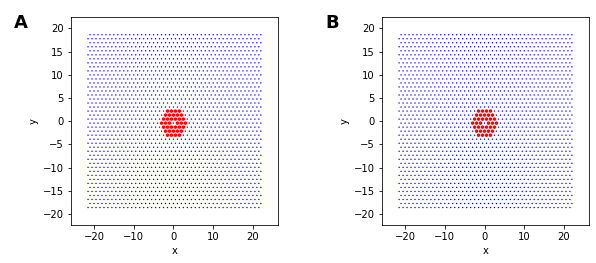

In [29]:
%%capture --no-display

center = lsig.get_center_cells(X)

pts = hv.Points(
    X
).opts(
    color="b",
    s=2
)

pts * hv.Points(
   X[iAdj[center].nonzero()[1]]
).opts(
    color="r",
    s=12
) + pts * hv.Points(
   X[kAdj[center].nonzero()[1]]
).opts(
    color="r",
    s=12
)

In [46]:
# Set sender cell
sender_idx = lsig.get_center_cells(X)

# Get RHS
krhs = get_rhs(kAdj, sender_idx, tc_rhs_2a_kn)

irhs = get_rhs(iAdj, sender_idx, tc_rhs_2a_kn)

In order to retain the biphasic nature of propagation dynamics and make the propagation area quantitatively accurate across densities, I had to make a few changes.
- From the experimental data for initial density 1250 mm^-2, the propagation radius spreads to roughly 11-12 cell lengths in 48hrs, or 2 doubling times (actually more than 12 cell lengths, since cells are being compressed by cell division). This means that propagation must proceed at least at a rate of 6 cell lengths per doubling time. Based on this, I increased the neighbor radius to `kn=3` and shortened the delay time to `delay=0.3`. 
- I dropped the signaling threshold to `k=0.06`. This is because when we increase `kn`, signal is being distributed over more neighbors, so it is harder to activate a neighbor for the same threshold value. 

In [47]:
# Set new rate parameters
alpha = 3
k = 0.06
p = 2
delta = 3
lambda_ = 1e-5

# Set delay
delay = 0.3

In [48]:
# Set initial fluorescence
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

# Initialize results vector
S_rho0_t = np.empty((n_rho, nt, n), dtype=np.float32)
A_rho0_t = np.empty((n_rho, nt), dtype=np.float32)

iterator = range(n_rho)
iterator = tqdm(iterator)
for i in iterator:

    # Get parameters
    rho_0 = rho_0_space[i]
    rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
#     r_t = 1/np.sqrt(rho_t_)
#     ell_t = r_t / np.sqrt(3)

    # Package parameters
    args = (alpha, k, p, delta, lambda_, rho_t_[0])

    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        irhs,
        var_vals=rho_t_,
        dde_args=args,
        E0=S0,
        delay=delay,
        where_vars=5,
        min_delay=5,
        progress_bar=False,
    )

    S_rho0_t[i] = S_t
    n_act = (S_t > k).sum(axis=1)
    A_rho0_t[i] = A_cells_um(n_act, rho_t_)

100%|██████████| 13/13 [00:20<00:00,  1.60s/it]


In [49]:
# Select run to animate
run = 0

# Calculate logistic growth
rho_0 = rho_0_space[run]
rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
r_t = 1/np.sqrt(rho_t_)

# Set window to fixed size
X_t = (np.array([X] * nt) * r_t[:, np.newaxis, np.newaxis])
X_fin = X_t[-1]
xlim = X_fin[:, 0].min() * 0.95, X_fin[:, 0].max() * 0.95
ylim = X_fin[:, 1].min() * 0.95, X_fin[:, 1].max() * 0.95

# Save for later
run3, X_t3, xlim3, ylim3, rho_t_3, S_rho0_t3, args3, delay3 = run, X_t, xlim, ylim, rho_t_, S_rho0_t, args, delay

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_t3[i],
        rows=rows,
        cols=cols,
        var=S_rho0_t3[run], 
        idx=i,
        vmin=0, 
        vmax=4 * args3[1], 
        cmap="kgy",
#         xlim=xlim,
#         ylim=ylim,
        title=title,
    )

In [45]:
# Get max activated area for each condition
S_max_area = A_rho0_t.max(axis=1)

:Scatter   [rho_0]   (max_area)
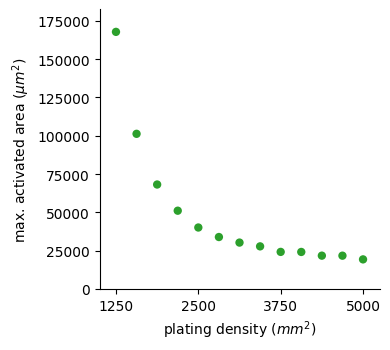

In [46]:
%%capture --no-display

data = {
    "max_area": S_max_area,
    "rho_0": rho_0_space * 1250,
}

p3 = hv.Scatter(
    data=data,
    kdims=["rho_0"], 
    vdims=["max_area"],
).opts(
    color=cc.glasbey_category10[2],
    xlabel=r"plating density ($mm^2$)",
    xlim=(1000, 5250),
    xticks=[1250, 2500, 3750, 5000],
    ylabel=r"max. activated area ($\mu m^2$)",
#     ylim=(   0, 200000),
    ylim=(0,None)
)

hv.output(p3, dpi=100)

In [47]:
# Set new rate parameters
alpha = 3.5
k = 0.075
p = 2
delta = 3
lambda_ = 1e-5

# Set delay
delay = 0.3

In [48]:
# Set initial fluorescence
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

# Initialize results vector
S_rho0_t = np.empty((n_rho, nt, n), dtype=np.float32)
A_rho0_t = np.empty((n_rho, nt), dtype=np.float32)

iterator = range(n_rho)
iterator = tqdm(iterator)
for i in iterator:

    # Get parameters
    rho_0 = rho_0_space[i]
    rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
#     r_t = 1/np.sqrt(rho_t_)
#     ell_t = r_t / np.sqrt(3)

    # Package parameters
    args = (alpha, k, p, delta, lambda_, rho_t_[0])

    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        krhs,
        var_vals=rho_t_,
        dde_args=args,
        E0=S0,
        delay=delay,
        where_vars=5,
        min_delay=5,
        progress_bar=False,
    )

    S_rho0_t[i] = S_t
    n_act = (S_t > k).sum(axis=1)
    A_rho0_t[i] = A_cells_um(n_act, rho_t_)

100%|██████████| 13/13 [00:02<00:00,  4.35it/s]


In [49]:
# Select run to animate
run = 0

# Calculate logistic growth
rho_0 = rho_0_space[run]
rho_t_ = rho_t(t, rho_0=rho_0, rho_max=rho_max)
r_t = 1/np.sqrt(rho_t_)

# Set window to fixed size
X_t = (np.array([X] * nt) * r_t[:, np.newaxis, np.newaxis])
X_fin = X_t[-1]
xlim = X_fin[:, 0].min() * 0.95, X_fin[:, 0].max() * 0.95
ylim = X_fin[:, 1].min() * 0.95, X_fin[:, 1].max() * 0.95

# Save for later
run4, X_t4, xlim4, ylim4, rho_t_4, S_rho0_t4, args4, delay4 = run, X_t, xlim, ylim, rho_t_, S_rho0_t, args, delay

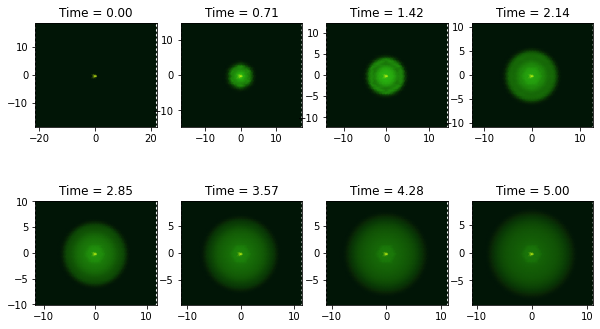

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_t[i],
        rows=rows,
        cols=cols,
        var=S_rho0_t[run], 
        idx=i,
        vmin=0, 
        vmax=4 * k, 
        cmap="kgy",
#         xlim=xlim,
#         ylim=ylim,
        title=title,
    )

In [51]:
# Get max activated area for each condition
S_max_area = A_rho0_t.max(axis=1)

:Scatter   [rho_0]   (max_area)
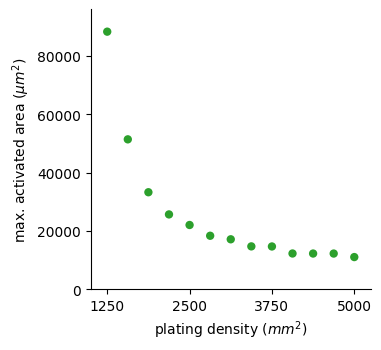

In [52]:
%%capture --no-display

data = {
    "max_area": S_max_area,
    "rho_0": rho_0_space * 1250,
}

p4 = hv.Scatter(
    data=data,
    kdims=["rho_0"], 
    vdims=["max_area"],
).opts(
    color=cc.glasbey_category10[2],
    xlabel=r"plating density ($mm^2$)",
    xlim=(1000, 5250),
    xticks=[1250, 2500, 3750, 5000],
    ylabel=r"max. activated area ($\mu m^2$)",
#     ylim=(   0, 200000),
    ylim=(0,None)
)

hv.output(p4, dpi=100)

<hr>

In [53]:
import os

## Save video

In [64]:
# Set directory
dir_name = "plots"

# Set filenames
vid3_fname = "propagation_irad_3_vid_alpha_{0:.2f}_k_{1:.2e}_tau_{2:.2f}".format(
    args3[0], args3[1], delay3
)
vid4_fname = "propagation_irad_3_vid_alpha_{0:.2f}_k_{1:.2e}_tau_{2:.2f}".format(
    args4[0], args4[1], delay4
)

Writing to: plots\propagation_irad_3_vid_alpha_3.00_k_6.00e-02_tau_0.30


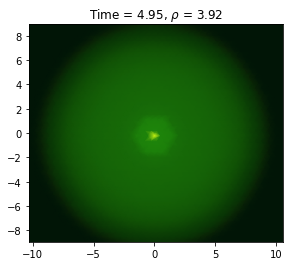

In [65]:
# Function for plot title
title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_t_3[i]:.2f}"
lsig.animate_colormesh(
    X_arr=X_t3,
    rows=rows,
    cols=cols,
    var_t=S_rho0_t3[run3],
    n_frames=100,
    file_name=vid3_fname,
    dir_name=dir_name,
    fps=20, 
    vmin=0, 
    vmax=4 * args3[1], 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim3,
    ylim=ylim3,
)

Writing to: plots\propagation_irad_3_vid_alpha_3.50_k_7.50e-02_tau_0.30


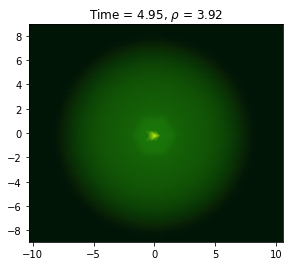

In [66]:
# Function for plot title
title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_t_3[i]:.2f}"
lsig.animate_colormesh(
    X_arr=X_t4,
    rows=rows,
    cols=cols,
    var_t=S_rho0_t4[run3],
    n_frames=100,
    file_name=vid4_fname,
    dir_name=dir_name,
    fps=20, 
    vmin=0, 
    vmax=4 * args4[1], 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim4,
    ylim=ylim4,
)

## Save plots

In [67]:
# Set filepath and format
fmt = "png"
dirname = "plots"

fname3 = "active_area_plot_irad_3_paramsC_alpha_{0:.2f}_k_{1:.2e}_tau_{2:.2f}_rhomax_{3:.2f}".format(
    args3[0], args3[1], delay3, rho_max
) + "." + fmt
fpath3 = os.path.join(dirname, fname3)

fname4 = "active_area_plot_irad_3_paramsD_alpha_{0:.2f}_k_{1:.2e}_tau_{2:.2f}_rhomax_{3:.2f}".format(
    args4[0], args4[1], delay4, rho_max
) + "." + fmt
fpath4 = os.path.join(dirname, fname4)

fname34 = "active_area_plot_irad_3_paramsCD_overlay"
fpath34 = os.path.join(dirname, fname34)

In [73]:
# Make plots for overlays
p1o = p1.opts(ylim=(0, 180000), color=None).relabel("close-range, param set A")
p2o = p2.opts(ylim=(0, 180000), color=None).relabel("close-range, param set B")
p3o = p3.opts(ylim=(0, 180000), color=None).relabel("mid-range, param set C")
p4o = p4.opts(ylim=(0, 180000), color=None).relabel("mid-range, param set D")

:Overlay
   .Scatter.Mid_hyphen_minus_range_comma_param_set_C :Scatter   [rho_0]   (max_area)
   .Scatter.Mid_hyphen_minus_range_comma_param_set_D :Scatter   [rho_0]   (max_area)
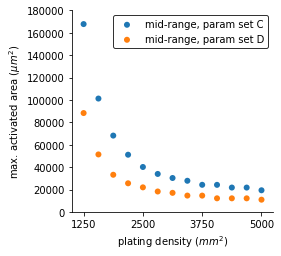

In [74]:
%%capture --no-display

p3o * p4o

In [75]:
%%capture --no-display

hv.save(p3o * p4o, fpath34, fmt=fmt, dpi=150)
# hv.save(p4.opts(ylim=(0, 180000)), fpath4, fmt=fmt, dpi=150)

    Param set C
    alpha = 3
    k     = 0.06 **
    p     = 2
    delta = 3
    delay = 0.3

    Param set D
    alpha = 3.5   **
    k     = 0.075 **
    p     = 2
    delta = 3
    delay = 0.3

<hr>